**In this part of the analysis we will mainly focus on-**

**I) Busiest Starting and ending stations.**

**II) Most frequent starting and ending station combinations.** 

**III) Then we will share our recommendations, summary, feedback, observations and learning from the project.**

In [1]:
# calling libraries
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import transforms, pyplot as plt
import networkx as nx
%matplotlib inline
#%matplotlib

In [2]:
#calling the saved dataframe
%store -r df
%store -r df_time
%store -r df_customer
%store -r df_subscriber

In [7]:
#Colors that will be used throughout the analysis- taken from ref 5 accessed during Dec-2018
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'



### 8) What are the busiest starting and ending stations?


**Visuals:**: To answer this question we shall mostly use barplots. 

**8-A. What are the 10 most busiest starting stations?**

In [8]:
#Shape of the dataframe- gives the number of rows and columns
df.shape

(1651156, 26)

In [9]:
#finding top 10 starting stations 
df_top10_start = df['start_station_name'].value_counts().head(10)
df_top10_start= df_top10_start.rename_axis('start_station_name').reset_index(name='number')
df_top10_start 

,start_station_name,number
0,San Francisco Caltrain Station 2 (Townsend St...,33759
1,San Francisco Caltrain (Townsend St at 4th St),32820
2,San Francisco Ferry Building (Harry Bridges Pl...,32350
3,Berry St at 4th St,31707
4,Market St at 10th St,31647
5,Montgomery St BART Station (Market St at 2nd St),29411
6,The Embarcadero at Sansome St,27523
7,Powell St BART Station (Market St at 4th St),27062
8,Steuart St at Market St,25865
9,Howard St at Beale St,25172


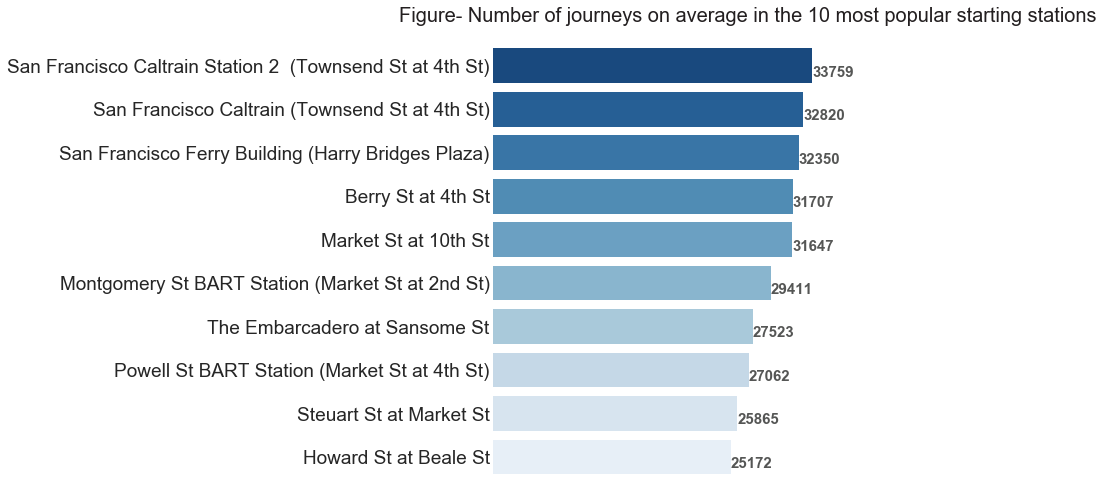

In [19]:
#plot, annotate and show figure
sns.set_style("whitegrid", {'axes.grid' : False})
ax = plt.figure(figsize = [6, 8])
data = df_top10_start    # data underlying bar plot in question
pal = sns.color_palette("Blues", len(data))
rank = df_top10_start.index   
sns.barplot(x=df_top10_start['number'], y=df_top10_start['start_station_name'], data=df_top10_start, palette=np.array(pal[::-1])[rank])

plt.ylabel("")
plt.xlabel("")
plt.rc('ytick',labelsize=19,color = GRAY5)

#remove border at the top, left and bottom
sns.despine(bottom=True, left=True, top=True)
#title
plt.text(-10e3, -1,'Figure- Number of journeys on average in the 10 most popular starting stations' , fontsize=20, color=GRAY1, linespacing=1.4)

#annotating values on the bar
for i, v in enumerate(df_top10_start['number']):
    plt.text(v, i + .25, str(v), color=GRAY3, fontsize = 15, fontweight='bold')

#turns off major and minor ticks and removes the labels from the x-axis.
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

#show plot
plt.show()


**8-B. What are the 10 most busiest ending stations?**

In [11]:
#finding top 10 ending stations 
df_top10_end = df['end_station_name'].value_counts().head(10)
df_top10_end= df_top10_end.rename_axis('end_station_name').reset_index(name='number')
df_top10_end 

,end_station_name,number
0,San Francisco Caltrain Station 2 (Townsend St...,44728
1,San Francisco Caltrain (Townsend St at 4th St),41146
2,San Francisco Ferry Building (Harry Bridges Pl...,37924
3,Montgomery St BART Station (Market St at 2nd St),33677
4,The Embarcadero at Sansome St,30976
5,Market St at 10th St,30901
6,Berry St at 4th St,30584
7,Powell St BART Station (Market St at 4th St),28863
8,Steuart St at Market St,25785
9,Powell St BART Station (Market St at 5th St),22947


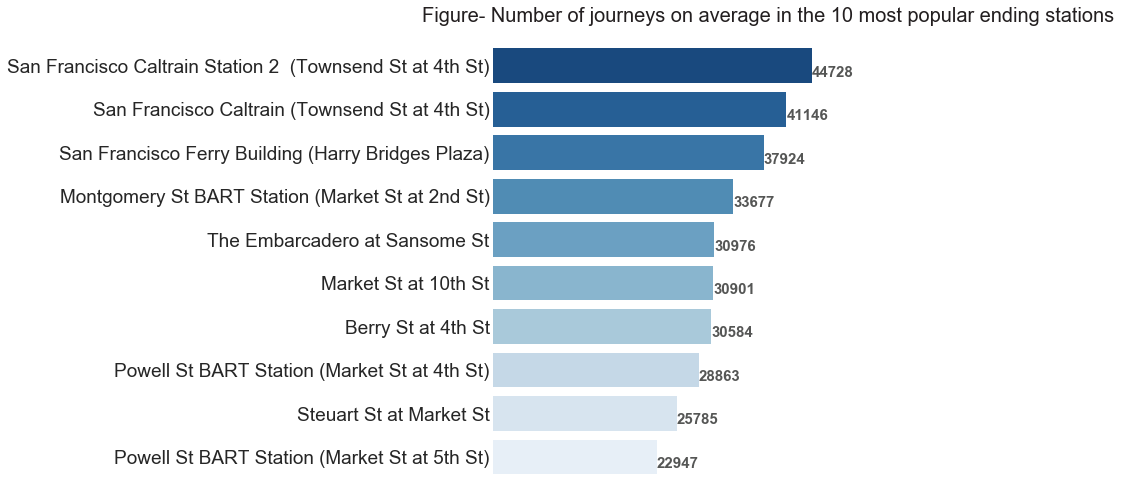

In [12]:
#plot, annotate and show figure
sns.set_style("whitegrid", {'axes.grid' : False})
ax = plt.figure(figsize = [6, 8])
data = df_top10_end    # data underlying bar plot in question
pal = sns.color_palette("Blues", len(data))
rank = df_top10_end.index   
sns.barplot(x=df_top10_end['number'], y=df_top10_end['end_station_name'], data=df_top10_end, palette=np.array(pal[::-1])[rank])

#lables-empty
plt.ylabel("")
plt.xlabel("")
plt.yticks(fontsize=19)

#remove borders
sns.despine(bottom=True, left=True, top=True)


#title
plt.text(-10e3, -1,'Figure- Number of journeys on average in the 10 most popular ending stations' , fontsize=20, color=GRAY1, linespacing=1.4)

for i, v in enumerate(df_top10_end['number']):
    plt.text(v, i + .25, str(v), color=GRAY3, fontsize = 15, fontweight='bold')

#turns off major and minor ticks and removes the labels from the x-axis.
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.show()

## Observations

**1.** In this part, we have explored what are the busiest starting and ending stations.


**2.** Interestingly, the top 3 starting stations are also the top 3 ending stations.


**3.** There are 9 common stations when we compare the top starting and ending stations. 


**4.** The average number of people in the ending stations are higher compared to the starting stations. 

**8-C. What are the most frequent starting and ending stations combinations?** 

In [14]:
# creasting a tuple with the start and end station id
df['start_end'] = df[['start_station_id','end_station_id']].apply(tuple, axis=1)

In [15]:
# See if the tuple has been created
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance,start_end
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,2018,1,22,19,1254.733333,Weekday,32,Winter,2.488001,"(120.0, 285.0)"
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,2018,1,14,10,1192.933333,Weekday,22,Winter,2.972357,"(304.0, 296.0)"
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,2018,1,19,6,666.100000,Weekday,27,Winter,2.443038,"(74.0, 19.0)"
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,...,2018,1,23,0,7.550000,Weekday,30,Winter,1.340181,"(110.0, 134.0)"
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,...,2018,1,23,23,3.000000,Weekday,38,Winter,0.631765,"(81.0, 93.0)"


In [16]:
#finding top 10 start end stations combination
busiest_network = df.groupby(['start_end']).size().reset_index(name='count')
busiest_network = busiest_network.nlargest(10,'count')
busiest_network

,start_end,count
1498,"(15.0, 6.0)",6102
440,"(6.0, 16.0)",4570
9292,"(81.0, 15.0)",4203
20033,"(182.0, 196.0)",3744
21173,"(196.0, 182.0)",3728
439,"(6.0, 15.0)",3218
1560,"(15.0, 81.0)",3127
21068,"(195.0, 182.0)",3038
1645,"(16.0, 6.0)",3004
10300,"(90.0, 67.0)",2664


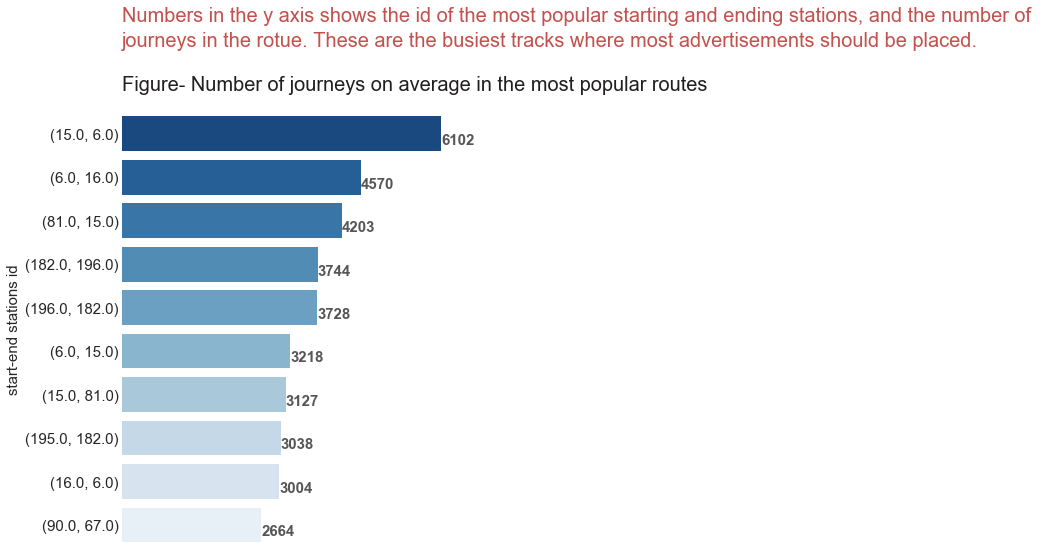

In [28]:
#plot, annotate and show figure
sns.set_style("whitegrid", {'axes.grid' : False})
ax = plt.figure(figsize = [6, 8])
data = df_top10_end    # data underlying bar plot in question
pal = sns.color_palette("Blues", len(data))
rank = df_top10_end.index   
sns.barplot(y=busiest_network['start_end'], x=busiest_network['count'], data=busiest_network, palette=np.array(pal[::-1])[rank])

#lables-empty
plt.ylabel("start-end stations id", fontsize = 15)
plt.xlabel("")
plt.yticks(fontsize=15)

#remove borders
sns.despine(bottom=True, left=True, top=True)


#title
plt.text(0, -1,'Figure- Number of journeys on average in the most popular routes' , 
         fontsize=20, color=GRAY1, linespacing=1.4)

#title
plt.text(-1, -2,'Numbers in the y axis shows the id of the most popular starting and ending stations, and the number of \njourneys in the rotue. These are the busiest tracks where'
         ' most advertisements should be placed.', fontsize=20, color=RED1, linespacing=1.4)


#show the value
for i, v in enumerate(busiest_network['count']):
    plt.text(v, i + .25, str(v), color=GRAY3, fontsize = 15, fontweight='bold')

#turns off major and minor ticks and removes the labels from the x-axis.
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

#show plot
plt.show()


## Observations

**1.** In this part, we have explored what is the combination of the busiest starting and ending stations.

**2.** The average number of people in the combinations of the starting and ending stations are much lower compared to the starting and ending stations. 

### 9. Recommendations

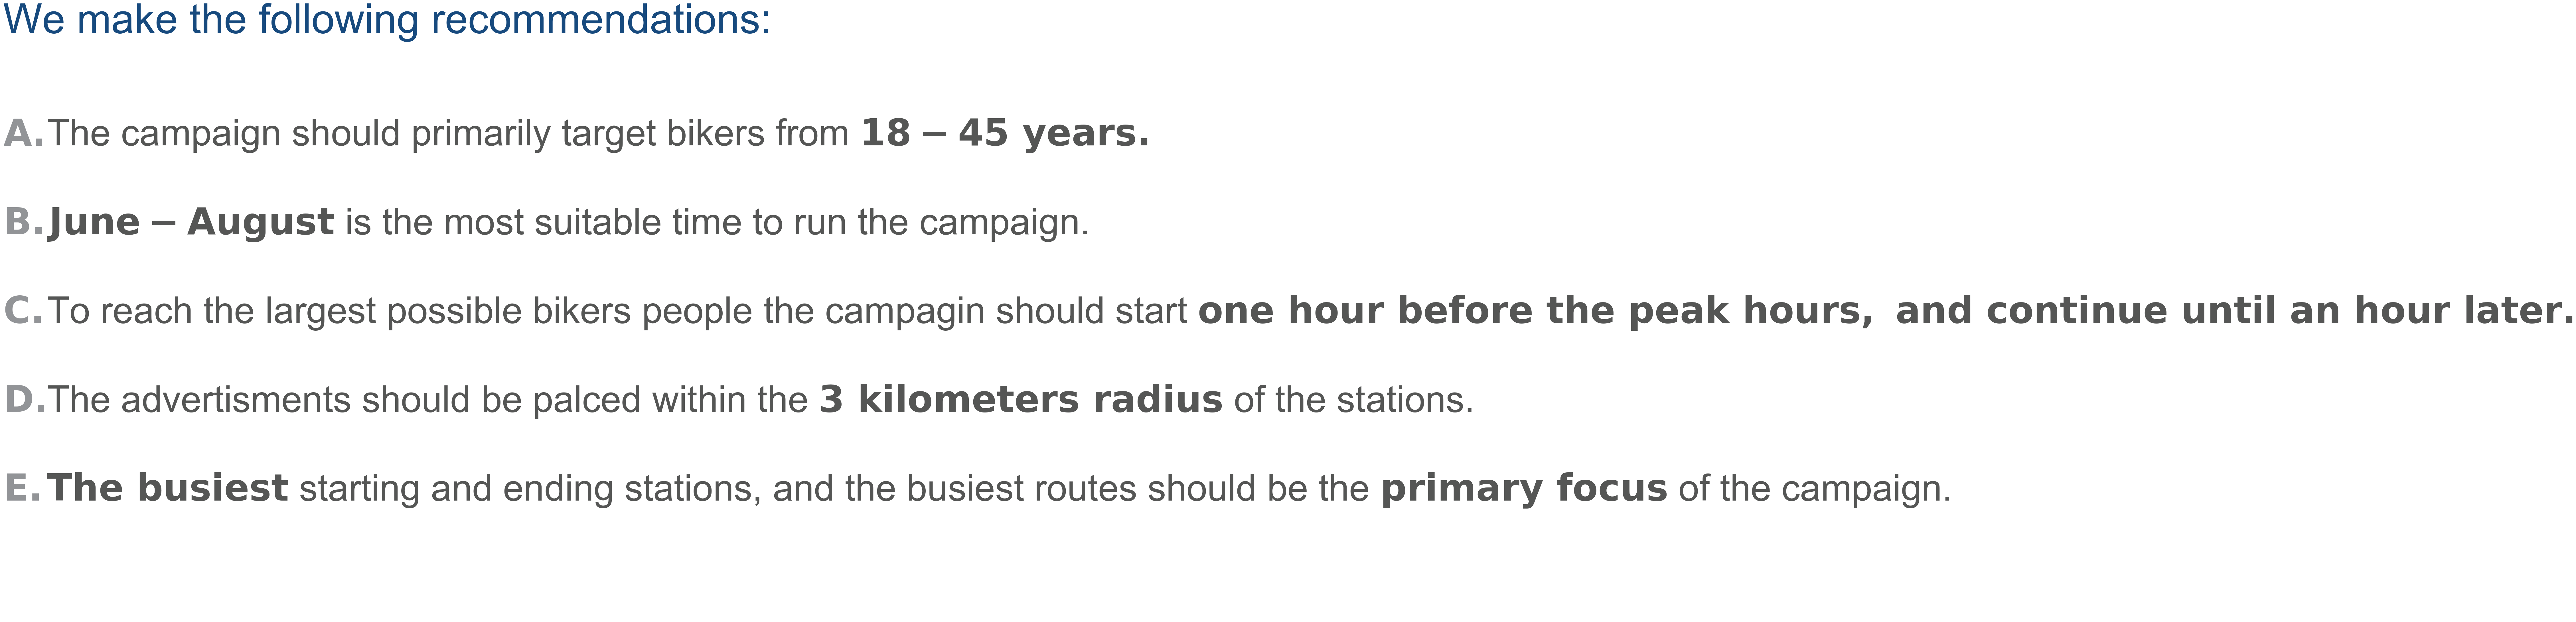

In [58]:
# create new figure
plt.figure(figsize=(15, 25), # width, height in inches
           dpi=110)             # resolution of the figure

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# change the appearance of ticks, tick labels, and gridlines 
plt.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)

#adding text- the outline of this datastory
plt.text(-0.14, 0.99, 'We make the following recommendations:',fontsize=95, color=BLUE1)
plt.text(-0.14, 0.80, '$\\bf{A.}$',fontsize=85, color=GRAY7)
plt.text(-0.02, 0.80, 'The campaign should primarily target bikers from ' '$\\bf{18-45\ years.}$',fontsize=85, color=GRAY3)

plt.text(-0.14, 0.65, '$\\bf{B.}$',fontsize=85, color=GRAY7)
plt.text(-0.02, 0.65, '$\\bf{June-August}$'' is the most suitable time to run the campaign.',fontsize=85, color=GRAY3)

plt.text(-0.14, 0.50, '$\\bf{C.}$',fontsize=85, color=GRAY7)
plt.text(-0.02, 0.50, 'To reach the largest possible bikers people the campagin should start ' '$\\bf{one\ hour\ before\ the\ peak\ hours,\ and\ continue\ until\ an\ hour\ later.}$',fontsize=85, color=GRAY3)

plt.text(-0.14, 0.35, '$\\bf{D.}$',fontsize=85, color=GRAY7)
plt.text(-0.02, 0.35, 'The advertisments should be palced within the ' '$\\bf{3\ kilometers\ radius}$'' of the stations.',fontsize=85, color=GRAY3)

plt.text(-0.14, 0.20, '$\\bf{E.}$',fontsize=85, color=GRAY7)
plt.text(-0.02, 0.20, '$\\bf{The\ busiest}$'' starting and ending stations, and the busiest routes should be the ' '$\\bf{primary\ focus}$'' of the campaign.',fontsize=85, color=GRAY3)

#show plot
plt.show()

### 10. Summary
    
The findings of the exploratory analysis is summarized below:

A.	88.61% of the bikers are Subscribers and 11.39% are the subscribers.

B.	Among the bikers 73.5% are male and 24.92 % are female. Female percentage is higher among the Customers than the subscribers. 

C.	80% of the bikers are less than 43 years old and 99% of the bikers are in the range of 18-66 years old. Larger number of young male bikers explains why the accident victims are mostly young male.

D.	In working days (Mon-Friday),  8 and 17 hours are the two peak hours and in the weekend 13hr is the peak hour of the day.

E.	Tuesday and Wednesday are the busiest days of the week and Saturday and Sunday are the quietest days of the week with the least number of bikers on the road.

F.	May to October is the busiest time of the year. More than 60% of the total journeys take place during this time of the year.

G.	Both the Subscribers and the customers prefer May to September for biking and they follow almost similar pattern.

H.	Summer comprises of the month June to August and it is the busiest season of the year. December to February is the season of winter and the least amount of biking take place during this time of the year.

I.	On average, Customers bike for a much longer duration than the Subscribers. Both the customers and the subscribers bike for a longer duration in the weekend.

J.	Customers and Subscribers bike for the longest duration during summer weekends and the lowest during winter weekdays.

K.	Most of the customers and subscribers bike 0-3 kilometers distance.

L.	On average, bikers bike almost similar distance throughout the week in all the months.

M.	There is no significant correlation between age, distance and duration of biking.

N.	Busiest starting and ending stations and the most popular starting and ending stations has been listed.



### 11.  Unusual distributions , Data Cleaning and Feature Engineering

A. From the age distributions, it was clear that the age that went beyond 100 years are clearly erroneous. Instead, of excluding the age variable all together, I choose to focus on the dominant age group.

B. I have introduced the age category using various age group intervals. Likewise, I have extraced time, day of the week- whether it is a weekday or weekend, month- and season based on the data in order to find patterns.  

C. I anticipated the young male population will dominate the bikers. However, I am little surprised to see- there is a large gap between male and female bikers. Apparently, female in the Sanfran cisco choose to bike far less which is very diffrent from the Netherlands where I currently live in. 

D. I expected that the people will enjoy biking in summer which is also the case. But Surprisingly, instead of June, July or August the Month of October has the largest number of bikers on the roads which was interestng for me. Could it be because of the comfortbale temperature or any other factor or it was jsut that parcitular year- we can not tell at this point.

E. Although, this data story is about accident and a campagin about bike safety, we do not have any data on the time, and place of the accident. Hence, it is hard to draw any strong causal relationship. 

## 12. Feedback

Throughout the project, I have taken feedback from some of my friends. I have got following feedback :

•	Initially, I just started exploring the dataset without a problem statement in my mind. One of my friends has suggested me adding a problem statement at the beginning of the analysis and to coomunicate it as an interesting story. After receiving the feedback, I have added a problem statement at the beginning.

•	I was tempted to use most of the exploratpry visualization. One of the viewers has suggested me to reduce the number of visualizations and just focus on the ones so that the readers do not feel lost. convey the message.

•	I have asked two other colleagues for their feedback to understand what features of this dataset might be interesting for them. One of them was interested to see the impact of season on biking patters. I have extracted the season from the dataset to see the busiest season for the bikers.

•	At times, I was tempted to use more fancy plots. But from the feedback, I realized that, it is not a good idea to use uncommon plots that takes time for the readers to ger familiarized. Instead, I should use plots that the readers can understand easily. So, I used the most common graphs to leverage the user experience. 


## 13. LEARNINGS
I have learnt the following important lessons-

•	The power of storytelling to convey an important message in a presentation.

•	How to analyze a data set with a structure that is readily accessible by the viewer, and why we should always keep the viewer's perspectives in mind.

•	Why some plots and graphs are better than others, and what are the attributes of good plots. I have learnt using preattentive attributes and colors strategically to draw attention. Also, how to add active title to assist the reader in getting the message quickly out of a plot.

•	How to think like a designer and make plots accessible to a reader.

•	Finally, it is important to get some fresh perspectives, as our data analysis is as good as it is perceived by the audience.


## Ref:
    
**[8].** https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

**[9].** https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot

**[10]**. Udacity Data Analyst Nanodegree Course Materials

**[11]**.For other general query: https://stackoverflow.com

**[12]**.Storytelling With Data: A Data Visualization Guide for Business Professionals Book by Cole Nussbaumer Knaflic